### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df_application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_df_application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

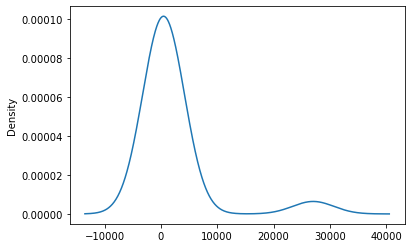

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_df_application_counts.plot.density()

According to the density plot, the most common unique values have more than 250 instances within the dataset. Therefore, we can bucket any country that appears fewer than 250 times in the dataset as "other." To do this, we'll use a Python for loop and Pandas' replace method. To our notebooks, we need to add and run the following code:

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_df_application_counts[application_df_application_counts < 250].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
application_df_classification_counts = application_df['CLASSIFICATION'].value_counts()
application_df_classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C1245        1
C1580        1
C1732        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

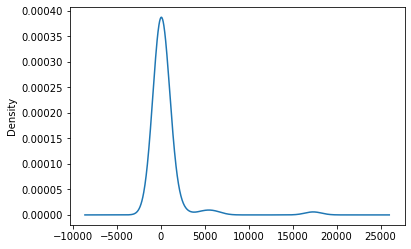

In [8]:
# Visualize the value counts of CLASSIFICATION
application_df_classification_counts.plot.density()

According to the density plot, the most common unique values have more than 3000 instances within the dataset. Therefore, we can bucket any country that appears fewer than 3000 times in the dataset as "other." To do this, we'll use a Python for loop and Pandas' replace method. To our notebooks, we need to add and run the following code:

In [9]:
# Determine which values to replace if counts are less than 3000
replace_class = list(application_df_classification_counts[application_df_classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,
    input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 0s 503us/step - loss: 0.5713 - accuracy: 0.7215
Epoch 2/100
804/804 [==============================] - 0s 494us/step - loss: 0.5567 - accuracy: 0.7299
Epoch 3/100
804/804 [==============================] - 0s 476us/step - loss: 0.5532 - accuracy: 0.7324
Epoch 4/100
804/804 [==============================] - 0s 483us/step - loss: 0.5513 - accuracy: 0.7332
Epoch 5/100
804/804 [==============================] - 0s 483us/step - loss: 0.5502 - accuracy: 0.7330
Epoch 6/100
804/804 [==============================] - 0s 479us/step - loss: 0.5487 - accuracy: 0.7334
Epoch 7/100
804/804 [==============================] - 0s 492us/step - loss: 0.5484 - accuracy: 0.7339
Epoch 8/100
804/804 [==============================] - 0s 551us/step - loss: 0.5469 - accuracy: 0.7350
Epoch 9/100
804/804 [==============================] - 0s 503us/step - loss: 0.5468 - accuracy: 0.7349
Epoch 10/100
804/804 [==============================] - 0s 519us/step - l

804/804 [==============================] - 0s 465us/step - loss: 0.5363 - accuracy: 0.7401
Epoch 80/100
804/804 [==============================] - 0s 463us/step - loss: 0.5363 - accuracy: 0.7404
Epoch 81/100
804/804 [==============================] - 0s 464us/step - loss: 0.5362 - accuracy: 0.7404
Epoch 82/100
804/804 [==============================] - 0s 466us/step - loss: 0.5363 - accuracy: 0.7403
Epoch 83/100
804/804 [==============================] - 0s 464us/step - loss: 0.5364 - accuracy: 0.7409
Epoch 84/100
804/804 [==============================] - 0s 468us/step - loss: 0.5364 - accuracy: 0.7407
Epoch 85/100
804/804 [==============================] - 0s 464us/step - loss: 0.5363 - accuracy: 0.7409
Epoch 86/100
804/804 [==============================] - 0s 464us/step - loss: 0.5366 - accuracy: 0.7395
Epoch 87/100
804/804 [==============================] - 0s 465us/step - loss: 0.5361 - accuracy: 0.7409
Epoch 88/100
804/804 [==============================] - 0s 473us/step - loss:

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
model1_performance = print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
model1_performance

268/268 - 0s - loss: 0.5610 - accuracy: 0.7259
Loss: 0.5610365867614746, Accuracy: 0.7259474992752075


Considering an accuracy of 0.72, and a loss of 0.6, this neural network model is certainly underperforming. This may be due to using an inappropriate model. The most straightforward means of improving neural network performance is tweaking the model design and parameters.

The ReLU function is ideal for positive nonlinear input data, so I will not be changing the activation function. After creating a visualization of the model's loss and accuracy over 100 epochs, we will add more epocks to the training regimen

<AxesSubplot:>

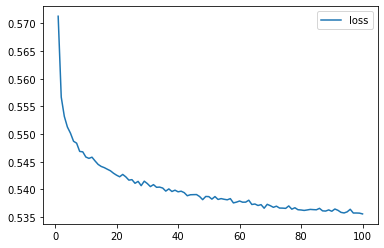

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

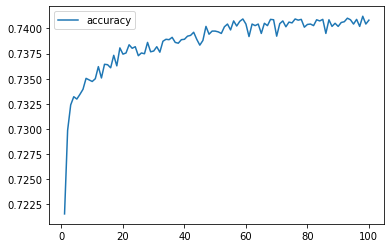

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In the following revision to the neural network, we will increase the number of epochs in the training regimen. As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients. This may not be the most effective method because if the model produces weight coefficients that are too effective, there is an increased chance of overfitting. Nonetheless, lets give it a try.

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,
    input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 0s 482us/step - loss: 0.5360 - accuracy: 0.7410
Epoch 2/200
804/804 [==============================] - 0s 477us/step - loss: 0.5358 - accuracy: 0.7409
Epoch 3/200
804/804 [==============================] - ETA: 0s - loss: 0.5364 - accuracy: 0.74 - 0s 482us/step - loss: 0.5358 - accuracy: 0.7414
Epoch 4/200
804/804 [==============================] - 0s 483us/step - loss: 0.5358 - accuracy: 0.7413
Epoch 5/200
804/804 [==============================] - 0s 537us/step - loss: 0.5354 - accuracy: 0.7412
Epoch 6/200
804/804 [==============================] - 0s 486us/step - loss: 0.5358 - accuracy: 0.7411
Epoch 7/200
804/804 [==============================] - 0s 487us/step - loss: 0.5356 - accuracy: 0.7407
Epoch 8/200
804/804 [==============================] - 0s 479us/step - loss: 0.5349 - accuracy: 0.7423
Epoch 9/200
804/804 [==============================] - 0s 474us/step - loss: 0.5351 - accuracy: 0.7408
Epoch 10/200
804/804 [=========

804/804 [==============================] - 0s 485us/step - loss: 0.5336 - accuracy: 0.7413
Epoch 80/200
804/804 [==============================] - 0s 480us/step - loss: 0.5342 - accuracy: 0.7414
Epoch 81/200
804/804 [==============================] - 0s 478us/step - loss: 0.5335 - accuracy: 0.7414
Epoch 82/200
804/804 [==============================] - 0s 474us/step - loss: 0.5337 - accuracy: 0.7419
Epoch 83/200
804/804 [==============================] - 0s 478us/step - loss: 0.5336 - accuracy: 0.7414
Epoch 84/200
804/804 [==============================] - 0s 481us/step - loss: 0.5338 - accuracy: 0.7419
Epoch 85/200
804/804 [==============================] - 0s 475us/step - loss: 0.5333 - accuracy: 0.7418
Epoch 86/200
804/804 [==============================] - 0s 474us/step - loss: 0.5336 - accuracy: 0.7416
Epoch 87/200
804/804 [==============================] - 0s 479us/step - loss: 0.5336 - accuracy: 0.7422
Epoch 88/200
804/804 [==============================] - 0s 474us/step - loss:

804/804 [==============================] - 0s 515us/step - loss: 0.5325 - accuracy: 0.7425
Epoch 158/200
804/804 [==============================] - 0s 488us/step - loss: 0.5330 - accuracy: 0.7420
Epoch 159/200
804/804 [==============================] - 0s 490us/step - loss: 0.5324 - accuracy: 0.7425
Epoch 160/200
804/804 [==============================] - 0s 500us/step - loss: 0.5326 - accuracy: 0.7425
Epoch 161/200
804/804 [==============================] - 0s 518us/step - loss: 0.5336 - accuracy: 0.7418
Epoch 162/200
804/804 [==============================] - 0s 486us/step - loss: 0.5321 - accuracy: 0.7426
Epoch 163/200
804/804 [==============================] - 0s 478us/step - loss: 0.5323 - accuracy: 0.7421
Epoch 164/200
804/804 [==============================] - 0s 479us/step - loss: 0.5327 - accuracy: 0.7428
Epoch 165/200
804/804 [==============================] - 0s 483us/step - loss: 0.5327 - accuracy: 0.7422
Epoch 166/200
804/804 [==============================] - 0s 481us/ste

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
model2_performance = print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
model2_performance

268/268 - 0s - loss: 0.7597 - accuracy: 0.5254
Loss: 0.7596631050109863, Accuracy: 0.5253644585609436


In the following model we will add a single hidden layer for a total of three hidden layers. Adding hidden layers changes the structure of the model, which allows neurons to train on activated input values, instead of looking at new training data. Therefore, a neural network with multiple layers can identify nonlinear characteristics of the input data without requiring more input data. There will be a greater chance of overfitting.

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20

nn_new1 = tf.keras.models.Sequential()

# First hidden layer
nn_new1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,
    input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#nn_new1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_new1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_new1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 0s 481us/step - loss: 0.5306 - accuracy: 0.7429
Epoch 2/100
804/804 [==============================] - 0s 481us/step - loss: 0.5307 - accuracy: 0.7431
Epoch 3/100
804/804 [==============================] - 0s 476us/step - loss: 0.5308 - accuracy: 0.7426
Epoch 4/100
804/804 [==============================] - 0s 478us/step - loss: 0.5308 - accuracy: 0.7433
Epoch 5/100
804/804 [==============================] - 0s 473us/step - loss: 0.5310 - accuracy: 0.7424
Epoch 6/100
804/804 [==============================] - 0s 489us/step - loss: 0.5307 - accuracy: 0.7428
Epoch 7/100
804/804 [==============================] - 0s 481us/step - loss: 0.5309 - accuracy: 0.7427
Epoch 8/100
804/804 [==============================] - 0s 482us/step - loss: 0.5309 - accuracy: 0.7428
Epoch 9/100
804/804 [==============================] - 0s 486us/step - loss: 0.5305 - accuracy: 0.7423
Epoch 10/100
804/804 [==============================] - 0s 478us/step - l

804/804 [==============================] - 0s 479us/step - loss: 0.5304 - accuracy: 0.7433
Epoch 80/100
804/804 [==============================] - 0s 478us/step - loss: 0.5306 - accuracy: 0.7429
Epoch 81/100
804/804 [==============================] - 0s 477us/step - loss: 0.5334 - accuracy: 0.7428
Epoch 82/100
804/804 [==============================] - 0s 477us/step - loss: 0.5304 - accuracy: 0.7425
Epoch 83/100
804/804 [==============================] - 0s 476us/step - loss: 0.5317 - accuracy: 0.7429
Epoch 84/100
804/804 [==============================] - 0s 479us/step - loss: 0.5302 - accuracy: 0.7425
Epoch 85/100
804/804 [==============================] - 0s 490us/step - loss: 0.5302 - accuracy: 0.7428
Epoch 86/100
804/804 [==============================] - 0s 484us/step - loss: 0.5302 - accuracy: 0.7430
Epoch 87/100
804/804 [==============================] - 0s 487us/step - loss: 0.5301 - accuracy: 0.7425
Epoch 88/100
804/804 [==============================] - 0s 493us/step - loss:

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new1.evaluate(X_test_scaled,y_test,verbose=3)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.7490125298500061, Accuracy: 0.4738192558288574
